## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os
from sklearn.model_selection import train_test_split
import keras
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import joblib
os.chdir('D:\Traffic_Sign_Recognition')

Using TensorFlow backend.


## Retrieving the images

In [2]:
data = []
labels = []
# We have 43 Classes
classes = 43

In [3]:
for i in range(classes):
    path = os.path.join(os.getcwd(),'Train',str(i))
    images = os.listdir(path)
    for j in images:
        try:
            image = Image.open(path + '\\'+ j)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading images")

In [4]:
#Converting lists into numpy arrays bcoz its faster and takes lesser memory
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(40708, 30, 30, 3) (40708,)


## Splitting the dataset

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)

In [6]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [7]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(32566, 30, 30, 3) (8142, 30, 30, 3) (32566, 43) (8142, 43)


## Displaying a sample of images

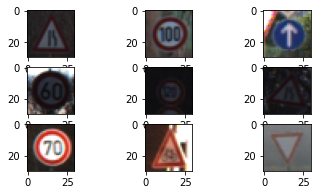

In [8]:
for i,image in enumerate(x_train,1):
    if(i==10):
        break
            
    plt.subplot(4,3,i)
    plt.imshow(image)

## Building CNN Model

In [9]:
model = Sequential()

### The architecture of model

In [10]:
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

In [11]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

In [12]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

## Applying the model and plotting the graphs for accuracy and loss

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)         

In [15]:
history = model.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_test, y_test))


Train on 32566 samples, validate on 8142 samples
Epoch 1/15
32566/32566 [==============================] - 74s 2ms/step - loss: 2.2744 - accuracy: 0.4264 - val_loss: 0.8702 - val_accuracy: 0.7867
Epoch 2/15
32566/32566 [==============================] - 80s 2ms/step - loss: 1.0241 - accuracy: 0.6982 - val_loss: 0.3743 - val_accuracy: 0.8923
Epoch 3/15
32566/32566 [==============================] - 78s 2ms/step - loss: 0.6743 - accuracy: 0.8002 - val_loss: 0.2493 - val_accuracy: 0.9301
Epoch 4/15
32566/32566 [==============================] - 82s 3ms/step - loss: 0.5026 - accuracy: 0.8518 - val_loss: 0.2101 - val_accuracy: 0.9402
Epoch 5/15
32566/32566 [==============================] - 85s 3ms/step - loss: 0.4196 - accuracy: 0.8752 - val_loss: 0.1513 - val_accuracy: 0.9554
Epoch 6/15
32566/32566 [==============================] - 86s 3ms/step - loss: 0.3949 - accuracy: 0.8857 - val_loss: 0.1221 - val_accuracy: 0.9663
Epoch 7/15
32566/32566 [==============================] - 87s 3ms/st

In [16]:
model.save("Trafic_signs_model.h5")

In [29]:
model.save("traffic_classifier.h5")

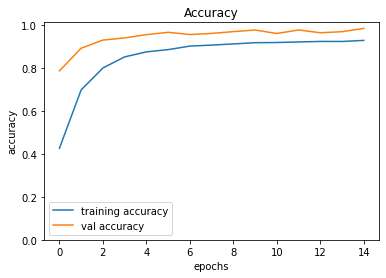

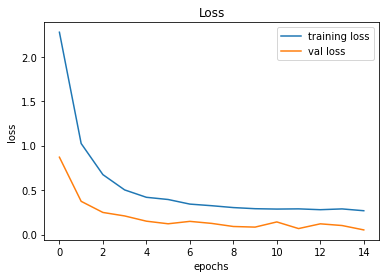

In [21]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.xticks(np.arange(0, 16, 2))
plt.yticks(np.arange(0, 1.2, 0.2))
plt.legend()
plt.show()

#plotting graphs for loss 
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.xticks(np.arange(0, 16, 2))
plt.yticks(np.arange(0, 2.5, 0.5))
plt.legend()
plt.show()

##  Testing our model with test dataset

In [22]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')

In [23]:
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

In [24]:
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)

In [25]:
pred = model.predict_classes(X_test)

In [27]:
#Accuracy with the test data
print(accuracy_score(labels, pred))

0.9559778305621536


# We made a traffic sign recognizer with the use of convolutional neural networks and got an accuracy of 98.4% on validation set and 95.6% on test set.